## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
def build_mlp(input_shape,output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95,0.05]

In [15]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mom in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with momentum = %.6f" % (mom))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    if mom == 0.95:
        nesterov=True
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=mom)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
    
        exp_name_tag = f"exp-mom-{mom}-nesterov-{nesterov}"
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
        
        nesterov=False
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=mom)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
    
        exp_name_tag = f"exp-mom-{mom}-nesterov-{nesterov}"
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
    else:
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mom)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
        exp_name_tag = f"exp-mom-{mom}-nesterov-{nesterov}"
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with momentum = 0.950000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====

Epoch 49/50
50000/50000 [==============================] - 5s 95us/step - loss: 0.4024 - accuracy: 0.8573 - val_loss: 2.2029 - val_accuracy: 0.5345
Epoch 50/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.3699 - accuracy: 0.8677 - val_loss: 2.2619 - val_accuracy: 0.5126
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 77us/step - loss: 0.7097 - accuracy: 0.7503 - val_loss: 2.0059 - val_accuracy: 0.4996
Epoch 2/50
50000/50000 [==============================] - 4s 74us/step - loss: 0.8327 - accuracy: 0.7042 - val_loss: 1.9139 - val_accuracy: 0.4946
Epoch 3/50
50000/50000 [==============================] - 4s 84us/step - loss: 0.7532 - accuracy: 0.7291 - val_loss: 1.8705 - val_accuracy: 0.4760
Epoch 4/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.6390 - accuracy: 0.7707 - val_loss: 2.0028 - val_accuracy: 0.4919
Epoch 5/50
50000/50000 [==============================] - 4s 78us/

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.0380 - accuracy: 0.2687 - val_loss: 1.9416 - val_accuracy: 0.2975
Epoch 2/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.8727 - accuracy: 0.3363 - val_loss: 1.8445 - val_accuracy: 0.3389
Epoch 3/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.8087 - accuracy: 0.3618 - val_loss: 1.9307 - val_accuracy: 0.3240
Epoch 4/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.7624 - accuracy: 0.3784 - val_loss: 1.7633 - val_accuracy: 0.3729
Epoch 5/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.7240 - accuracy: 0.3920 - val_loss: 1.7145 - val_accuracy: 0.3872
Epoch 6/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.6941 - accuracy: 0.4042 - val_loss: 1.7389 - val_accuracy: 0.3922
Epoch 7/50
50000/50000 [==============================] - 5s 98u

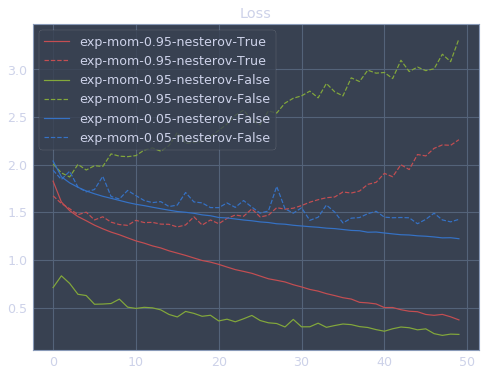

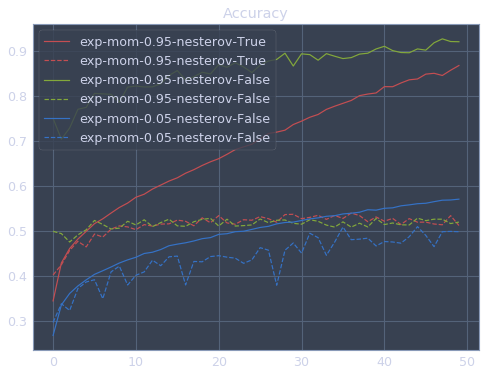

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [17]:
!jupyter nbconvert --to html Day_079_HW.ipynb Day_079_LearningRateEffect.ipynb

[NbConvertApp] Converting notebook Day_079_HW.ipynb to html
[NbConvertApp] Writing 532092 bytes to Day_079_HW.html
[NbConvertApp] Converting notebook Day_079_LearningRateEffect.ipynb to html
[NbConvertApp] Writing 540377 bytes to Day_079_LearningRateEffect.html
